# TRAIN SET Transformation 
and basic analysis

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np
import matplotlib as mp
import matplotlib.pyplot as mplt
import seaborn as sn
from scipy import stats

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report , f1_score

We have two tables that require to be merged into one for modelling. train_identity and train_transaction are 2 csv files. We will clean them individually and then merge them and then perform further analysis before we do any featurization and modelling.

# *IDENTITY TABLE*

In [2]:
df_i = pd.read_csv("train_identity.csv")

df_i.shape

(144233, 41)

In [3]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

id_12 to id_38 , DeviceType , DeviceInfo are categorical features given by the Kaggle host.

In [4]:
df_i.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [5]:
# null values in each column

for column in df_i:
    btao = df_i[column].isna().sum()
    btao2 = (btao * 100)/len(df_i)
    print(column + " -> " + str(btao2) + ' %')

TransactionID -> 0.0 %
id_01 -> 0.0 %
id_02 -> 2.33025729202055 %
id_03 -> 54.016071218098496 %
id_04 -> 54.016071218098496 %
id_05 -> 5.108400990064687 %
id_06 -> 5.108400990064687 %
id_07 -> 96.42592194574057 %
id_08 -> 96.42592194574057 %
id_09 -> 48.05211012736336 %
id_10 -> 48.05211012736336 %
id_11 -> 2.256765095366525 %
id_12 -> 0.0 %
id_13 -> 11.726165301976662 %
id_14 -> 44.50368500967185 %
id_15 -> 2.2519118370969196 %
id_16 -> 10.325653629890525 %
id_17 -> 3.37232117476583 %
id_18 -> 68.72213709761289 %
id_19 -> 3.4076806278729554 %
id_20 -> 3.4472000166397425 %
id_21 -> 96.42314865530079 %
id_22 -> 96.41621542920136 %
id_23 -> 96.41621542920136 %
id_24 -> 96.70879757059757 %
id_25 -> 96.44186836576928 %
id_26 -> 96.42037536486103 %
id_27 -> 96.41621542920136 %
id_28 -> 2.256765095366525 %
id_29 -> 2.256765095366525 %
id_30 -> 46.22243175972211 %
id_31 -> 2.7393176318872934 %
id_32 -> 46.2078719849133 %
id_33 -> 49.18707923984109 %
id_34 -> 46.056034333335646 %
id_35 -> 2.25

We can see that the train_idetity.csv table has a few features with over 70% missing values. Although simply dropping the feature is not advisable, there is no use for features with so many missing values. Imputing values for these features will not be statistically consistent since the population is very small.
Therefore we can drop features with a majority of missing values, like the features with over 70% missing values
For features with fewer missing values we can impute the mean/median or perhaps interpolate.

In [6]:
drop_identity = []
for column in df_i:
    btao = df_i[column].isna().sum()
    btao2 = (btao * 100)/len(df_i)
    if btao2 > 70:
        drop_identity.append(column)

drop_identity

['id_07',
 'id_08',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27']

In [7]:
for value in drop_identity:
    df_i.pop(value)

#df_i

In [8]:
# Categorical feature
print(df_i['DeviceType'].value_counts(dropna = 'True'))

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64


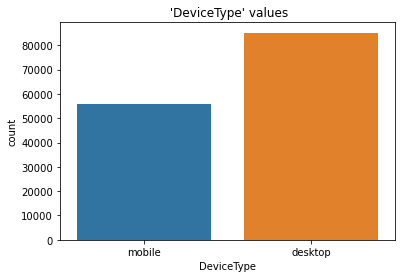

In [9]:
sn.countplot(x='DeviceType', data=df_i)
mplt.title(" 'DeviceType' values")
mplt.savefig('DeviceTYpe_hist')
mplt.show()

In [10]:
# Categorical feature
df_i['DeviceInfo'].value_counts()

Windows                        47722
iOS Device                     19782
MacOS                          12573
Trident/7.0                     7440
rv:11.0                         1901
                               ...  
LGLS755                            1
SM-N910T3                          1
STUDIO_G_HD                        1
ZTE BLADE A321 Build/NMF26F        1
9203A Build/MRA58K                 1
Name: DeviceInfo, Length: 1786, dtype: int64

We can also drop the DeviceInfo feature since it only describes the device details that are unique to a device like its build number, OS. Also there is no consistency in this feature in terms of what data has been captured, as can be see using the value_counts method. There are too many categories, 1786, although device OS is the most common captured data. 
The categories 'Windows', 'iOS Device' and 'MacOS' are the most common categories, contributing to 80,077 rows of data or 55.5% of the feature's categories. The remaining 44.5% values are too varied. Therefore we will drop DeviceInfo.

In [11]:
deviceInfo = df_i.pop('DeviceInfo')

In [12]:
drop_identity.append('DeviceInfo')

In [13]:
#there are no missing values in the categorical feature id_12
#df_i['id_12'].value_counts()

In [14]:
#id_12 = df_i.pop('id_12')

In [15]:
# id_15 is also a categorical feature
df_i['id_15'].value_counts()

Found      67728
New        61612
Unknown    11645
Name: id_15, dtype: int64

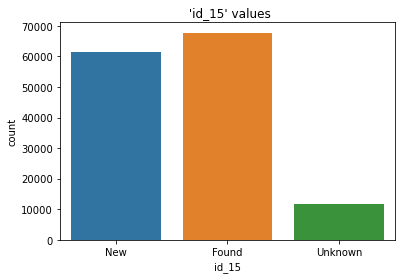

In [16]:
sn.countplot(x='id_15', data=df_i)
mplt.title(" 'id_15' values")
mplt.savefig('id_15_hist')
mplt.show()

In [17]:
# id_16 is also a categorical feature
df_i['id_16'].value_counts()

Found       66324
NotFound    63016
Name: id_16, dtype: int64

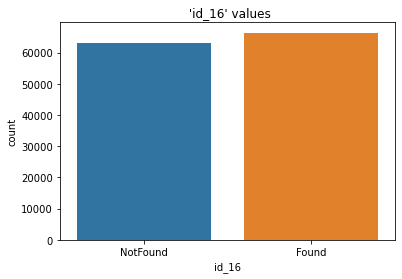

In [18]:
sn.countplot(x='id_16', data=df_i)
mplt.title(" 'id_16' values")
mplt.savefig('id_16_hist')
mplt.show()

In [19]:
# id_28 is also a categorical feature
df_i['id_28'].value_counts()

Found    76232
New      64746
Name: id_28, dtype: int64

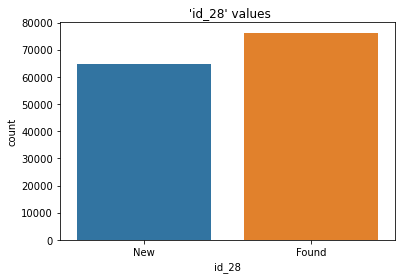

In [20]:
sn.countplot(x='id_28', data=df_i)
mplt.title(" 'id_28' values")
mplt.savefig('id_28_hist')
mplt.show()

In [21]:
# id_29 is also a categorical feature
df_i['id_29'].value_counts()

Found       74926
NotFound    66052
Name: id_29, dtype: int64

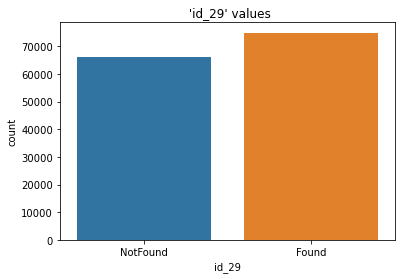

In [22]:
sn.countplot(x='id_29', data=df_i)
mplt.title(" 'id_29' values")
mplt.savefig('id_29_hist')
mplt.show()

In [23]:
# id_30 is also a categorical feature
df_i['id_30'].value_counts().to_frame()

,id_30
Windows 10,21155
Windows 7,13110
iOS 11.2.1,3722
iOS 11.1.2,3699
Android 7.0,2871
...,...
func,10
iOS 11.4.0,5
Mac OS X 10_13_5,4
Windows,3


We can see that id_30 is a categorical deature that describes the OS version and is therefore a categorical feature with far too many categories. So we can see this as a dataframe. By doing so we can see the number of unique categories, i.e 75 categories. Encoding this would take two routes-> either a binary vector of shape 1x75 or we can group the iOS versions into fewer categories like iOS 11.2.x (all 11.2's), etc, which would still end up adding more columns/features. Since we already have 400+ features, we need to reduce dimensionalty and not increase it. As we can see from the feature 'DeviceInfo', we might not find important trends using this feature since encoding would only increase the size of the dataset. We can drop this feature for now.
Also, id_30 -> 46.22243175972211 % missing values

In [24]:
id_30 =  df_i.pop('id_30')

In [25]:
drop_identity.append('id_30')

In [26]:
# id_31 is also a categorical feature
df_i['id_31'].value_counts().to_frame()

,id_31
chrome 63.0,22000
mobile safari 11.0,13423
mobile safari generic,11474
ie 11.0 for desktop,9030
safari generic,8195
...,...
chrome 69.0,1
firefox mobile 61.0,1
seamonkey,1
Cherry,1


id_31 has 130 categories. But id_31 -> 2.7393176318872934 % missign values. 
Much more sensible to drop it than increase dimensionality

In [27]:
id_31 = df_i.pop('id_31')

drop_identity.append('id_31')

In [28]:
# id_33 is also a categorical feature
df_i['id_33'].value_counts().to_frame()

,id_33
1920x1080,16874
1366x768,8605
1334x750,6447
2208x1242,4900
1440x900,4384
...,...
3696x2310,1
921x691,1
1264x924,1
2048x1080,1


id_33 -> 49.18707923984109 % missing values along with 260 categories. Must be dropped as well.

In [29]:
id_33 = df_i.pop('id_33')

drop_identity.append('id_33')

In [30]:
# id_34 is also a categorical feature
df_i['id_34'].value_counts()

match_status:2     60011
match_status:1     17376
match_status:0       415
match_status:-1        3
Name: id_34, dtype: int64

id_34 -> 46.056034333335646 % missing values and there are 4 categories. Although this feature can be encoded easily but there are too many missing values for any values to be imputed or interpolated since we also don't know what the feature represents. Again, we should drop this feature as well.

In [31]:
id_34 = df_i.pop('id_34')

drop_identity.append('id_34')

In [32]:
# id_35 is also a categorical feature
df_i['id_35'].value_counts()

T    77814
F    63171
Name: id_35, dtype: int64

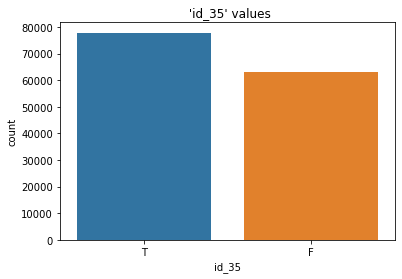

In [33]:
sn.countplot(x='id_35', data=df_i)
mplt.title(" 'id_35' values")
mplt.savefig('id_35_hist')
mplt.show()

In [34]:
# id_36 is also a categorical feature
df_i['id_36'].value_counts()

F    134066
T      6919
Name: id_36, dtype: int64

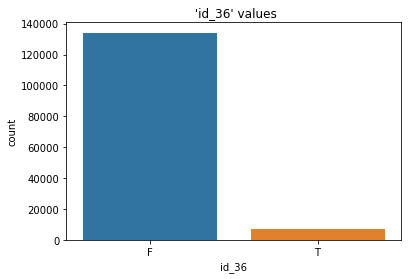

In [35]:
sn.countplot(x='id_36', data=df_i)
mplt.title(" 'id_36' values")
mplt.savefig('id_36_hist')
mplt.show()

In [36]:
# we can drop id_36 since it is imbalanced and so it won't add much to the customer trends that we want to visualize
id_36 = df_i.pop('id_36')

drop_identity.append('id_36')

In [37]:
# id_37 is also a categorical feature
df_i['id_37'].value_counts()

T    110452
F     30533
Name: id_37, dtype: int64

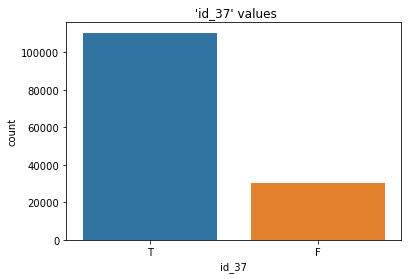

In [38]:
sn.countplot(x='id_37', data=df_i)
mplt.title(" 'id_37' values")
mplt.savefig('id_37_hist')
mplt.show()

In [39]:
# we can drop id_37 since it is imbalanced and so it won't add much to the customer trends that we want to visualize
id_37 = df_i.pop('id_37')

drop_identity.append('id_37')

id_36 and id_37 are imbalanced binary features and hence we dropped these as well. (just like id_12)

In [40]:
# id_38 is also a categorical feature
df_i['id_38'].value_counts()

F    73922
T    67063
Name: id_38, dtype: int64

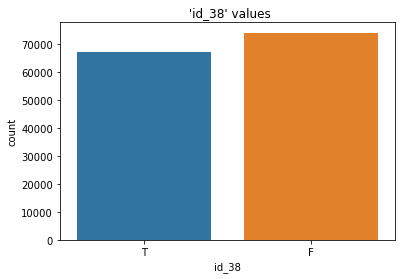

In [41]:
sn.countplot(x='id_38', data=df_i)
mplt.title(" 'id_38' values")
mplt.savefig('id_38_hist')
mplt.show()

In [42]:
#Let's look at the table again
df_i

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_28,id_29,id_32,id_35,id_38,DeviceType
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,New,NotFound,32.0,T,T,mobile
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,New,NotFound,32.0,T,T,mobile
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,Found,Found,NaN,F,T,desktop
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,New,NotFound,NaN,F,T,desktop
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,Found,Found,24.0,T,T,desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,NaN,427.0,139.0,Found,Found,NaN,F,F,mobile
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,15.0,352.0,333.0,New,NotFound,32.0,T,F,mobile
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,27.0,567.0,411.0,New,NotFound,NaN,F,F,mobile
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,15.0,352.0,368.0,Found,Found,24.0,T,F,desktop


In [43]:
#df_i.describe()
df_i['id_12'].value_counts()

NotFound    123025
Found        21208
Name: id_12, dtype: int64

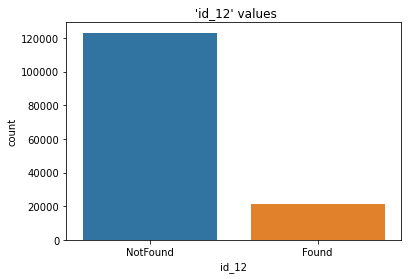

In [44]:
# id_12 is a binary catergorical feature represnted by the values 'Found' and 'NotFound'
sn.countplot(x='id_12', data=df_i)
mplt.title(" 'id_12' values")
mplt.savefig('id_12_hist')
mplt.show()

We see that id_12 is a binary categorical feature and and is imbalanced, but has no missing values. So we can keep it for now.

In [45]:
#id_12 = df_i.pop('id_12')

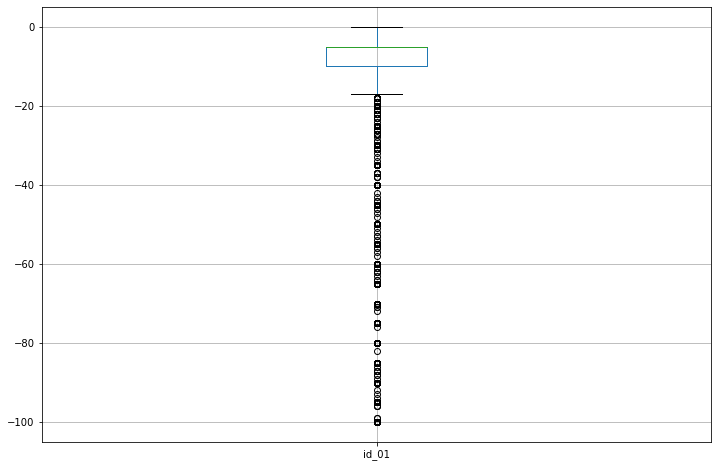

In [45]:
mplt.figure(figsize=(12,8))
df_i.boxplot('id_01')
mplt.show()

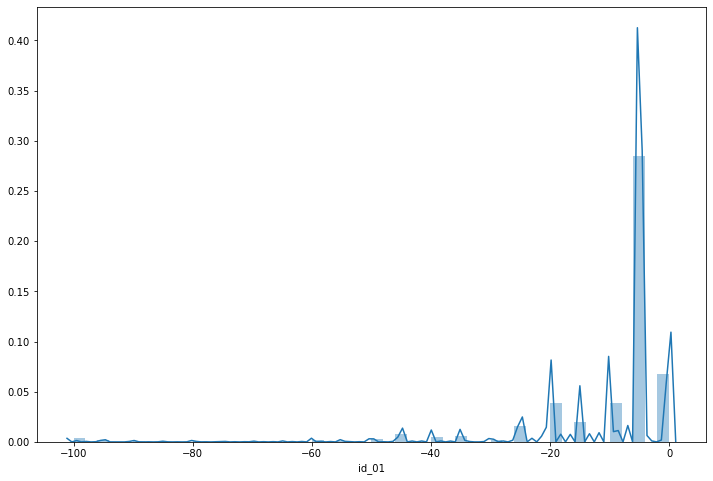

In [46]:
fig, ax = mplt.subplots(figsize=(12,8))
sn.distplot(df_i.id_01)

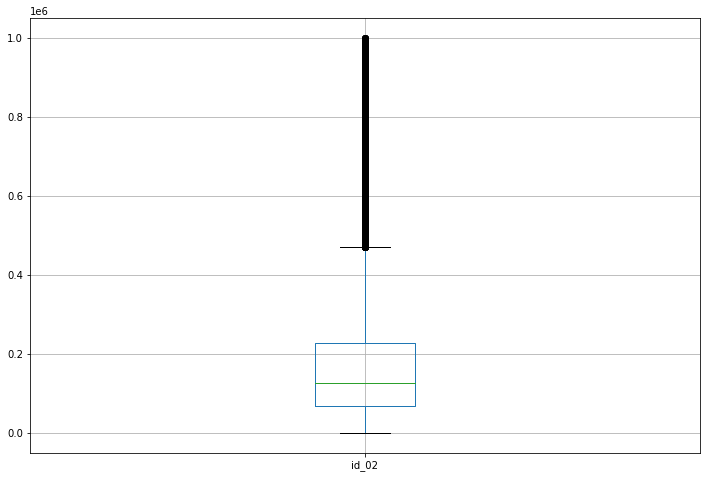

In [47]:
mplt.figure(figsize=(12,8))
df_i.boxplot('id_02')
mplt.show()

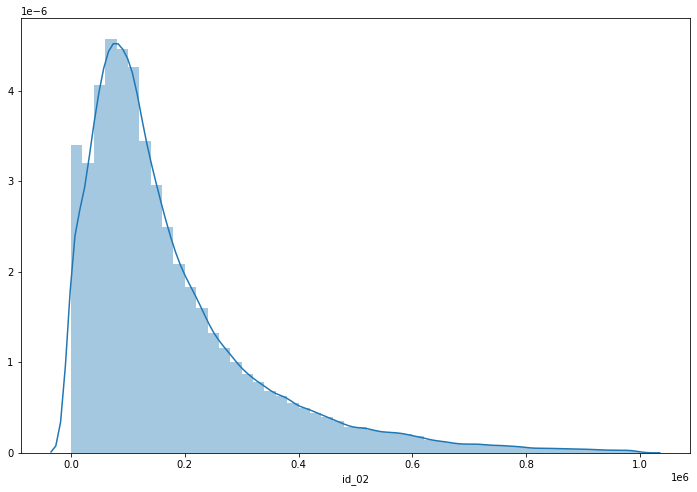

In [48]:
fig, ax = mplt.subplots(figsize=(12,8))
sn.distplot(df_i.id_02)

id_03 -> 54.016071218098496 % missing values


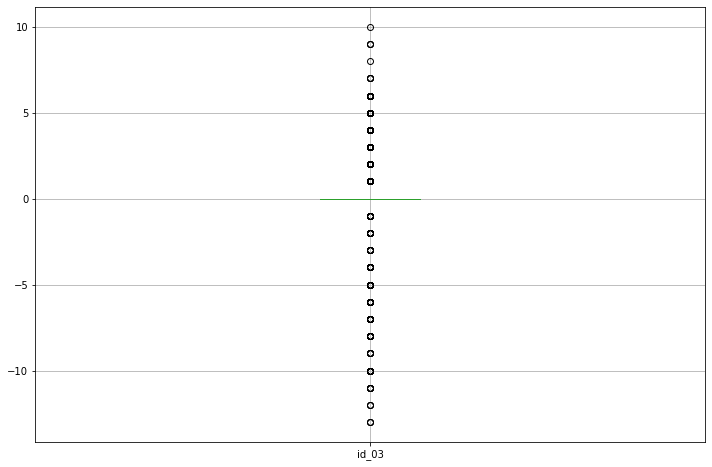

In [49]:
mplt.figure(figsize=(12,8))
df_i.boxplot('id_03')
mplt.show()

C:\Users\leobu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


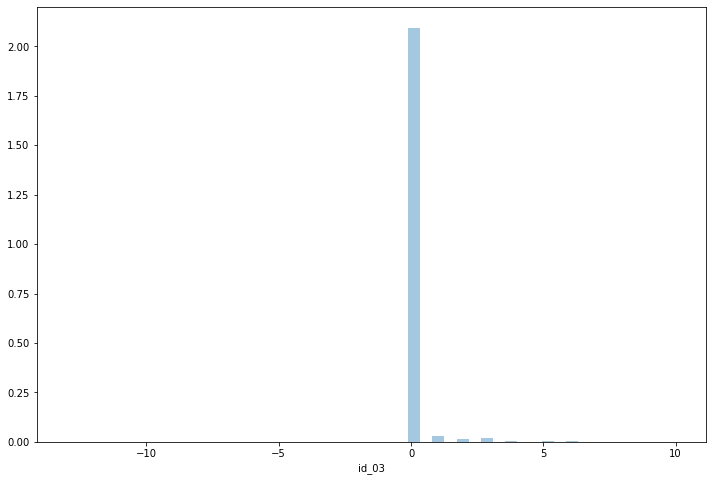

In [50]:
fig, ax = mplt.subplots(figsize=(12,8))
sn.distplot(df_i.id_03)

In [51]:
df_i['id_03'].value_counts(bins=4)

(-1.5, 4.25]        65967
(4.25, 10.0]          182
(-7.25, -1.5]         126
(-13.024, -7.25]       49
Name: id_03, dtype: int64

id_04 -> 54.016071218098496 % missing values

C:\Users\leobu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


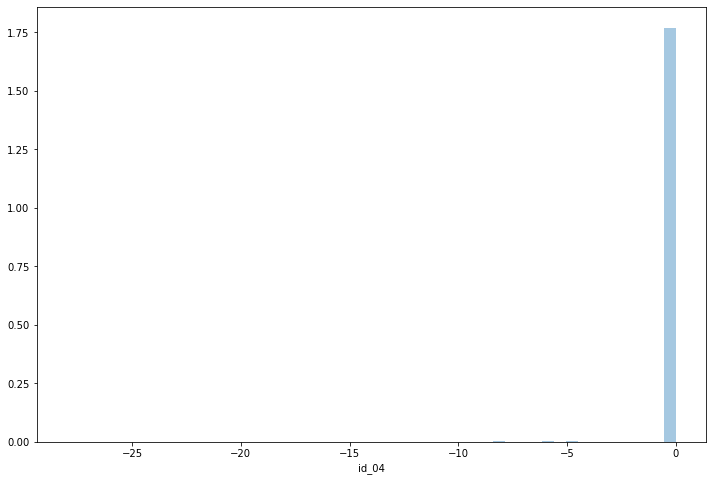

In [52]:
fig, ax = mplt.subplots(figsize=(12,8))
sn.distplot(df_i.id_04)

In [53]:
df_i['id_04'].value_counts(bins=4)

(-7.0, 0.0]         66088
(-14.0, -7.0]         234
(-28.029, -21.0]        2
(-21.0, -14.0]          0
Name: id_04, dtype: int64

We can see from the distributions of id_03 and id_04 that these are rather consistent values (very thin or highly peaked distributions).

id_03 has majority values lying in the interval (-1.5, 4.25] 

id_04 has majority values lying in the interval (-7.0, 0.0]

Adding to this, both these features have over 50% missing values. If we impute mean/median or interpolate these values to fill up the missing values, the intervals will largely remain the same. Since these values show very little variation, it would be like a constant when modelling. Therefore it would just be an extra feature that will be taken into consideration. Keeping it or removing it won't matter since there is very little variation.

At the same time, it can be said that there is very little variation (i.e. values lie in an interval) in these features and therefore imputing the missing values is safe

In [54]:
#id_03 = df_i.pop('id_03')
#id_04 = df_i.pop('id_04')

id_05 and id_06 have only 5% missing values and we can simply impute these with the mean/median in a later phase.

We are only focussed with features that have a large missing value corpus which were not previously filtered out as a further study will determine if these features are required, as can be seen with id_03 and id_04.

id_09 -> 48.05211012736336 % missing values

C:\Users\leobu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


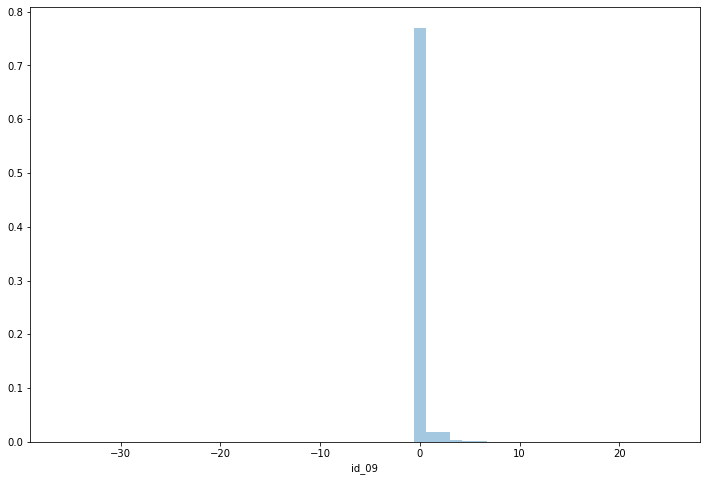

In [55]:
fig, ax = mplt.subplots(figsize=(12,8))
sn.distplot(df_i.id_09)

In [56]:
df_i['id_09'].value_counts(bins=4)

(-5.5, 9.75]         74625
(-20.75, -5.5]         246
(9.75, 25.0]            36
(-36.062, -20.75]       19
Name: id_09, dtype: int64

id_10 -> 48.05211012736336 % missing values

C:\Users\leobu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


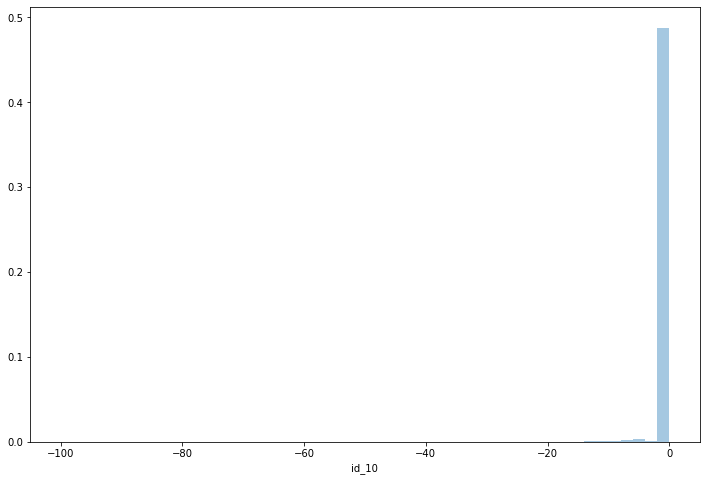

In [57]:
fig, ax = mplt.subplots(figsize=(12,8))
sn.distplot(df_i.id_10)

In [58]:
df_i['id_10'].value_counts(bins=4)

(-25.0, 0.0]         74743
(-50.0, -25.0]         137
(-75.0, -50.0]          26
(-100.101, -75.0]       20
Name: id_10, dtype: int64

We see the same trend with id_09 and id_10. 

In [59]:
#id_09 = df_i.pop('id_09')
#id_10 = df_i.pop('id_10')

id_32 -> 46.2078719849133 % (numerical)

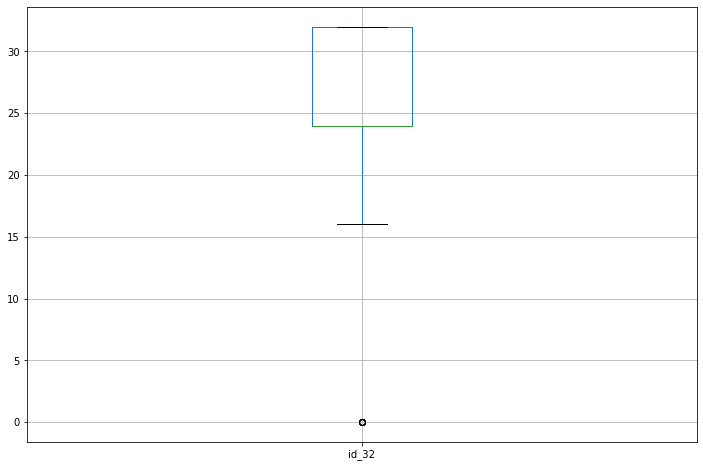

In [60]:
mplt.figure(figsize=(12,8))
df_i.boxplot('id_32')
mplt.show()

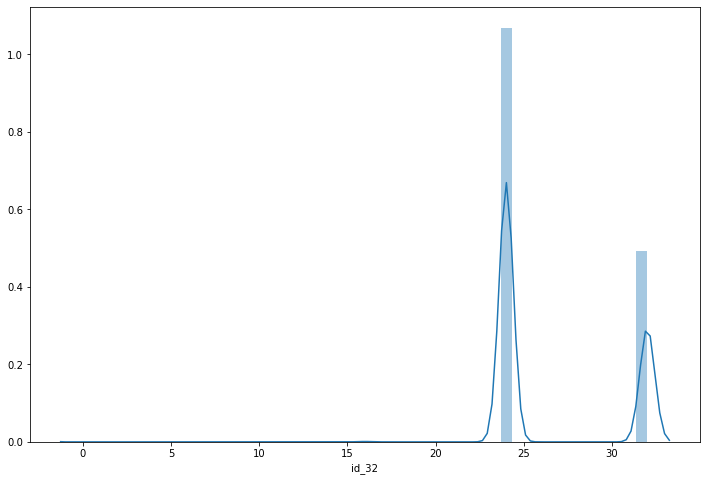

In [61]:
fig, ax = mplt.subplots(figsize=(12,8))
sn.distplot(df_i.id_32)

In [62]:
df_i['id_32'].value_counts(bins=4)

(16.0, 24.0]     53071
(24.0, 32.0]     24428
(8.0, 16.0]         81
(-0.033, 8.0]        6
Name: id_32, dtype: int64

In [63]:
# we have dropped the following number of features from the identity table 
len(drop_identity)

16

the values of id_32 lie within [ 16.0 , 32.0 ]



# *TRANSACTION TABLE*

In [64]:
df_t = pd.read_csv("train_transaction.csv")

df_t.shape

(590540, 394)

In [65]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [66]:
df_t.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [67]:
df_t.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,...,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,231.855423,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,...,26.806977,109.818544,247.606741,162.153398,18.372476,42.073133,28.326584,6.220289,13.103775,9.184612,0.058494,0.851040,0.296633,0.336790,1.312844,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,529.053494,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,...,116.853222,2270.033202,3980.042828,2793.343636,332.304848,473.499307,382.053171,56.022561,106.739813,73.627893,0.304415,3.950295,1.364356,1.580144,8.769083,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,37.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,206.000000,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600

In [68]:
# find % of empty values in each feature

for column in df_t:
    btao = df_t[column].isna().sum()
    btao2 = (btao * 100)/len(df_t)
    print(column + " -> " + str(btao2) + ' %')

TransactionID -> 0.0 %
isFraud -> 0.0 %
TransactionDT -> 0.0 %
TransactionAmt -> 0.0 %
ProductCD -> 0.0 %
card1 -> 0.0 %
card2 -> 1.5126833068039423 %
card3 -> 0.26501168422122123 %
card4 -> 0.267043722694483 %
card5 -> 0.7212043214684865 %
card6 -> 0.26602770345785215 %
addr1 -> 11.12642666034477 %
addr2 -> 11.12642666034477 %
dist1 -> 59.6523520845328 %
dist2 -> 93.62837403054831 %
P_emaildomain -> 15.99485216920107 %
R_emaildomain -> 76.75161716395164 %
C1 -> 0.0 %
C2 -> 0.0 %
C3 -> 0.0 %
C4 -> 0.0 %
C5 -> 0.0 %
C6 -> 0.0 %
C7 -> 0.0 %
C8 -> 0.0 %
C9 -> 0.0 %
C10 -> 0.0 %
C11 -> 0.0 %
C12 -> 0.0 %
C13 -> 0.0 %
C14 -> 0.0 %
D1 -> 0.21488806854743117 %
D2 -> 47.54919226470688 %
D3 -> 44.514850814508755 %
D4 -> 28.604666915026925 %
D5 -> 52.46740271615809 %
D6 -> 87.60676668811597 %
D7 -> 93.40992989467267 %
D8 -> 87.31229044603245 %
D9 -> 87.31229044603245 %
D10 -> 12.873302401192129 %
D11 -> 47.29349409015477 %
D12 -> 89.04104717715988 %
D13 -> 89.50926270870728 %
D14 -> 89.469468621

We can see that there are over a 100 features with at least 70% missing values. Since these features are not defined (or vaguely defined), we will have to drop these features.

In [69]:
drop_transaction = []
for column in df_t:
    btao = df_t[column].isna().sum()
    btao2 = (btao * 100)/len(df_t)
    if btao2 > 70:
        drop_transaction.append(column)

drop_transaction

['dist2',
 'R_emaildomain',
 'D6',
 'D7',
 'D8',
 'D9',
 'D12',
 'D13',
 'D14',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 '

In [70]:
for value in drop_transaction:
    df_t.pop(value)

#df_t

In [71]:
df_t.shape

(590540, 226)

168 features with more than 70% missing values have been dropped. Let us analyse the remaining 226.

TARGET VARIABLE

In [72]:
df_t['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

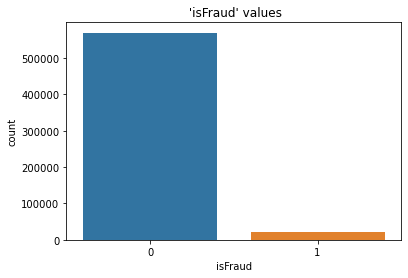

In [73]:
sn.countplot(x='isFraud', data=df_t)
mplt.title(" 'isFraud' values")
mplt.savefig('isFraud_hist')
mplt.show()

isFraud == 0 -> false i.e. not a fraud
isFraud == 1 -> true i.e. is a fraud transaction

In [74]:
df_t['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
windstream.net         305
roadrunner.com         305
hotmail.es             305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t

#df_t['R_emaildomain'].value_counts()

Clearly the features P_emaildomain and R_emaildomain are categorical (with far too many categories to be encoded), coupled (i.e. one is associated with the payer and the other with the receiver) and R_emaildomain has 76% missing values, and has already been dropped. Therefore, it renders P_emaildomain useless as well. It shall be dropped as well. 
Had there been sufficient values here, we could have looked for trends in senders-receivers email addresses using encoding.
Also, there are too many categories to encode

In [75]:
p_em = df_t.pop('P_emaildomain')

drop_transaction.append('P_emaildomain')

In [76]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 225 entries, TransactionID to V321
dtypes: float64(209), int64(4), object(12)
memory usage: 1013.7+ MB


In [77]:
df_t.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,...,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215,...,0.089034,0.298829,0.171655,0.045507,0.052002,0.251761,0.283140,0.264208,1.000007,139.748713,408.682375,230.413180,10.995986,118.195658,4.202175,39.173910,21.351473,43.319174,26.806977,109.818544,247.606741,162.153398,18.372476,42.073133,28.326584
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262,...,0.628352,3.175062,1.724218,0.289573,0.318310,0.481889,0.623608,0.528238,0.002603,2348.849634,4391.992977,3021.924247,116.254277,352.983093,102.374938,172.128339,95.902970,173.619028,116.853222,2270.033202,3980.042828,2793.343636,332.304848,473.499307,382.053171
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,151.380680,35.970001,0.000000,107.949997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396

In [78]:
df_t['TransactionID']

0         2987000
1         2987001
2         2987002
3         2987003
4         2987004
           ...   
590535    3577535
590536    3577536
590537    3577537
590538    3577538
590539    3577539
Name: TransactionID, Length: 590540, dtype: int64

All the transaction IDs are unique. These would only serve to differentiate between rows but every row is itself a distinct transaction. We don't need the unique transaction IDs for the machine learning model but we require it to join the two tables.

In [79]:
df_t['TransactionDT']

0            86400
1            86401
2            86469
3            86499
4            86506
            ...   
590535    15811047
590536    15811049
590537    15811079
590538    15811088
590539    15811131
Name: TransactionDT, Length: 590540, dtype: int64

We can see from the first 5 rows that the transaction date is not a sequence of numbers, in fact it seems to be the number of seconds. 
60x60x24 = 86400 (day 1 ie 0th or first transaction)
15811131/(60x60x24) = 182.99920138888888 or the 183rd day or the last transaction over a 6month period
Based on the sequence of the values in the feature, the transactionID are recorded based on the time of the transaction which is given in total number of seconds passed since first transaction.
1st transaction at 86401 is the transaction that occured exactly 1s after the initial or 0th transaction.

In [97]:
df_t['TransactionAmt'].value_counts(bins=5)

(-31.687, 6387.679]       590537
(25549.963, 31937.391]         2
(6387.679, 12775.107]          1
(19162.535, 25549.963]         0
(12775.107, 19162.535]         0
Name: TransactionAmt, dtype: int64

Bins = 50 ; rest were all bins with no datapoints lying inside

(-31.687, 638.994] 575463

(638.994, 1277.737] 10290

(1277.737, 1916.479] 2556

(1916.479, 2555.222] 1367

(2555.222, 3193.965] 651

(3193.965, 3832.708] 101

(3832.708, 4471.451] 72

(4471.451, 5110.193] 25

(5110.193, 5748.936] 11

(31298.648, 31937.391] 2

(5748.936, 6387.679] 1

(6387.679, 7026.422] 1

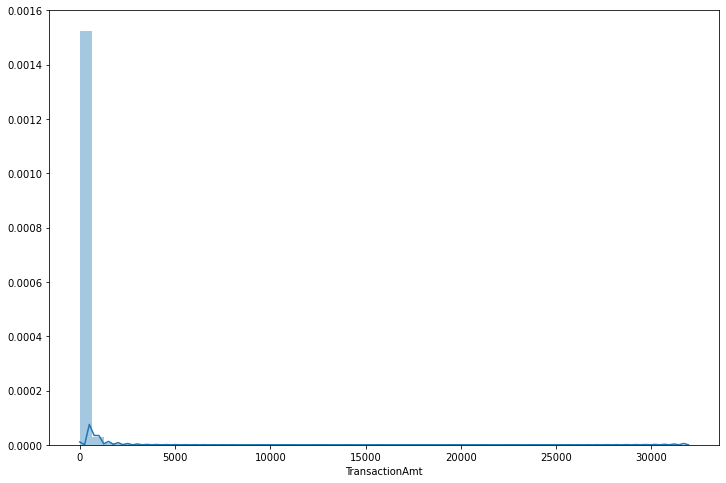

In [80]:
#df_t['TransactionAmt']
fig, ax = mplt.subplots(figsize=(12,8))
sn.distplot(df_t.TransactionAmt)

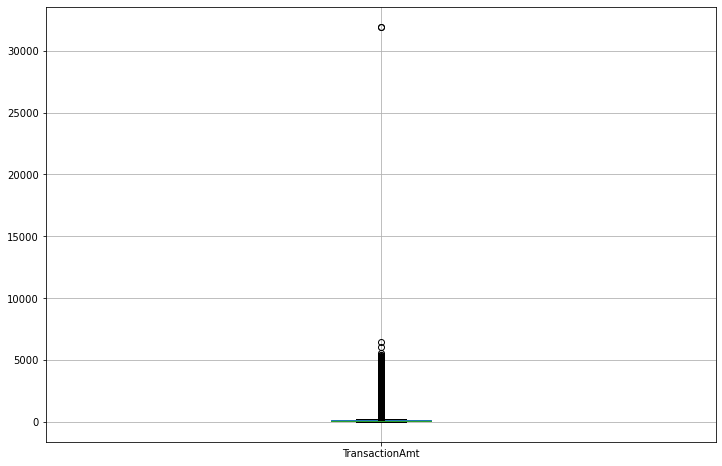

In [81]:
mplt.figure(figsize=(12,8))
df_t.boxplot('TransactionAmt')
mplt.show()

We can see from .describe function, boxplot and the distplot that the transaction amounts lie between 0.25 dollars and 31937.4 dollars.
We will have to use the 'isFraud' target variable with this to differentiate the transaction amount for legitimate and fraudulent transactions.

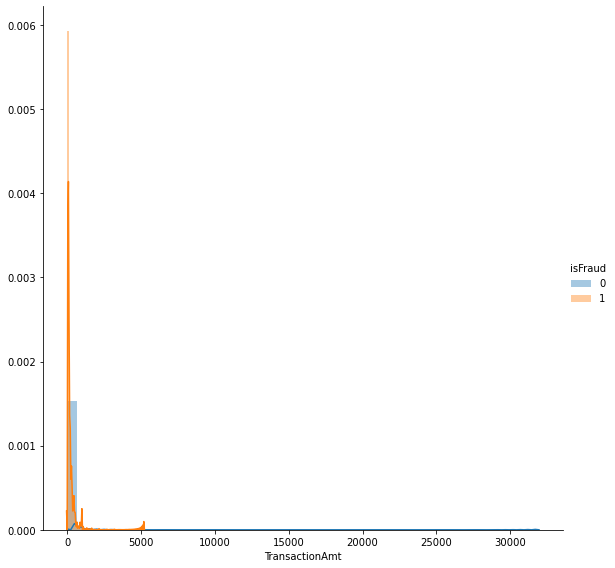

In [82]:
sn.FacetGrid(df_t, hue='isFraud' , height=8) \
   .map(sn.distplot, "TransactionAmt") \
   .add_legend();
mplt.show();

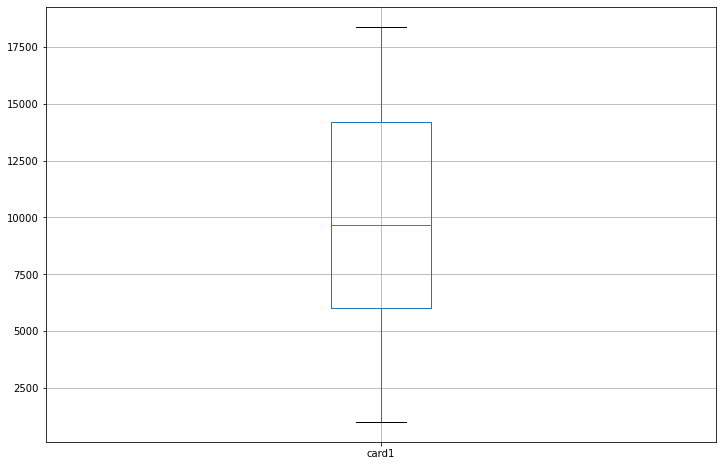

In [83]:
mplt.figure(figsize=(12,8))
df_t.boxplot('card1')
mplt.show()

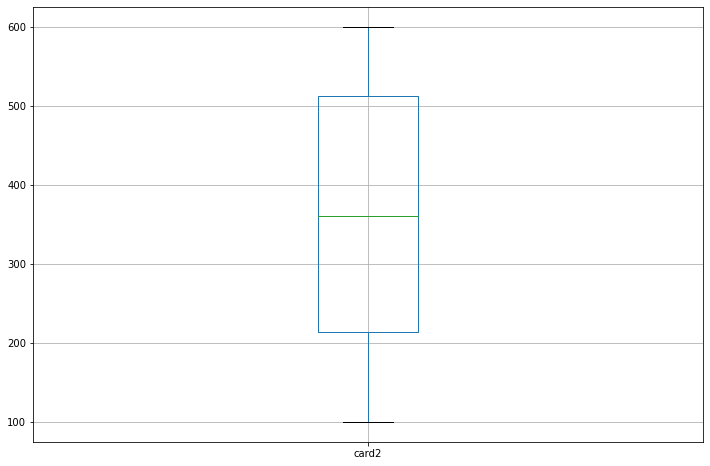

In [84]:
mplt.figure(figsize=(12,8))
df_t.boxplot('card2')
mplt.show()

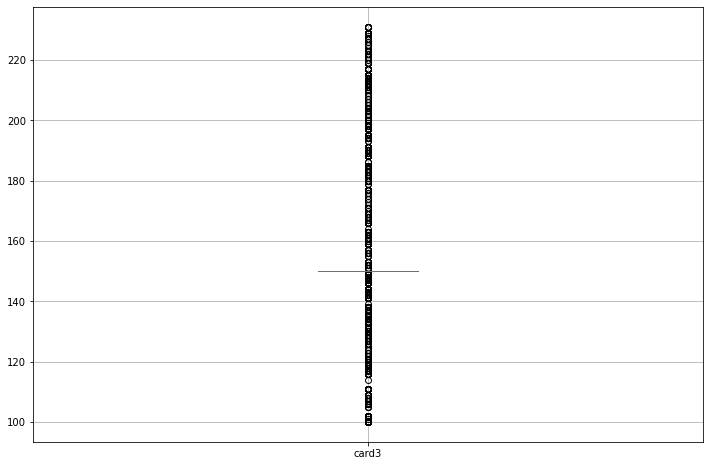

In [85]:
mplt.figure(figsize=(12,8))
df_t.boxplot('card3')
mplt.show()

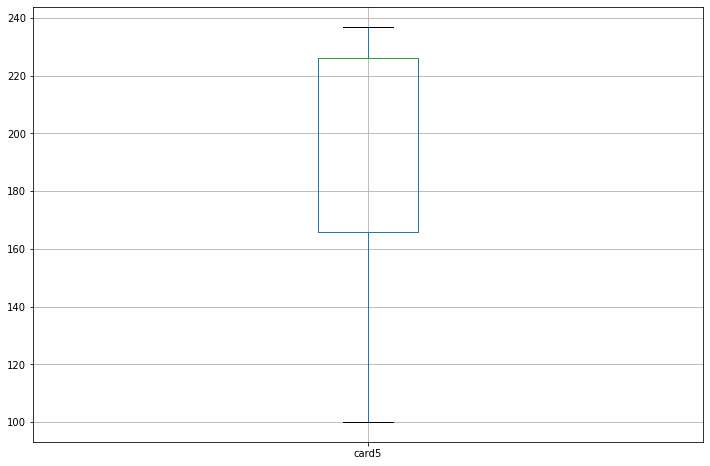

In [86]:
mplt.figure(figsize=(12,8))
df_t.boxplot('card5')
mplt.show()

Of the remaining 225 columns, 213 are numerical and 12 are categorical:
ProductCD, card4 and card6, addr1 and 2, M1 to M9

In [87]:
#card company
df_t['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [88]:
#Type of card
df_t['card6'].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [89]:
df_t['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

We can featurize these two features by making a binary vector/array of size = number of categories (4 for both card4 and card6) and (5 for ProductCD)

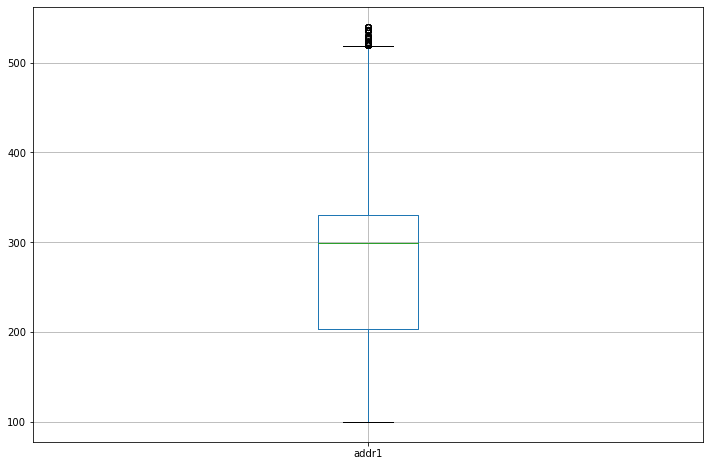

In [90]:
mplt.figure(figsize=(12,8))
df_t.boxplot('addr1')
mplt.show()

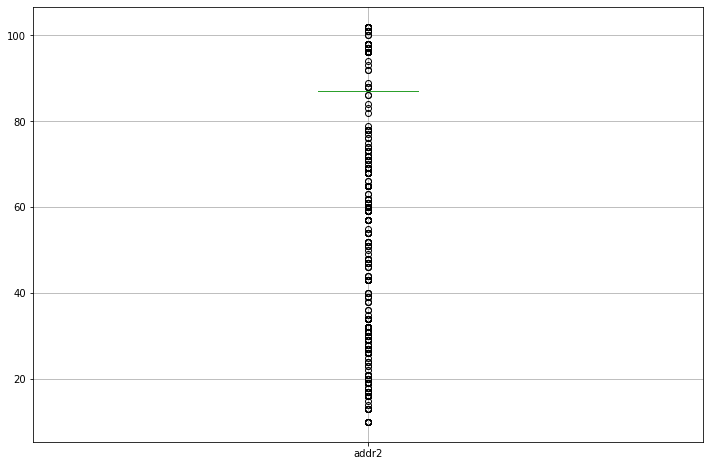

In [91]:
mplt.figure(figsize=(12,8))
df_t.boxplot('addr2')
mplt.show()

In [92]:
df_t['addr2'].value_counts(bins=4)

(79.0, 102.0]    521164
(56.0, 79.0]       3266
(9.907, 33.0]       332
(33.0, 56.0]         72
Name: addr2, dtype: int64

Both addr1 and addr2 are not categorical. We can also see the range of addr2 using bins parameter in value_counts() since there seem to be a lot of values seem to lie below the min ( q1 - IQR*1.5)

Moving onto the features dist1 and dist2. Both have a large number of missing values dist1 -> 59.6523520845328 %
dist2 -> 93.62837403054831 %

In [93]:
df_t['dist1'].value_counts(bins=4)

(-10.286999999999999, 2571.5]    237837
(2571.5, 5143.0]                    420
(5143.0, 7714.5]                      9
(7714.5, 10286.0]                     3
Name: dist1, dtype: int64

# Merge the two tables

In [94]:
train_set = df_t.merge(df_i, on='TransactionID', how='left')

In [95]:
train_set.shape

(590540, 249)

In [96]:
train_set

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,...,V321,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_28,id_29,id_32,id_35,id_38,DeviceType
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,New,NotFound,32.0,T,T,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,87.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We needed TransactionID only to merge the two tables on. Now we can drop this feature as it won't help in modelling process.

In [98]:
train_set.pop('TransactionID')

0         2987000
1         2987001
2         2987002
3         2987003
4         2987004
           ...   
590535    3577535
590536    3577536
590537    3577537
590538    3577538
590539    3577539
Name: TransactionID, Length: 590540, dtype: int64

The column 'Unnamed' was just an indexing column created s a result of merging two different datasets using 'TransactionID' which was the common feature (left join using TransactionID). Now we can remove these features since they were only part of the data to uniquely identity each row/transaction. We know that each row is a unique datapoint hence we can drop these 2 features.

## Drop categorical features

In [99]:
featype = train_set.dtypes

featype

isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
                   ...   
id_29              object
id_32             float64
id_35              object
id_38              object
DeviceType         object
Length: 248, dtype: object

In [100]:
train_set['card4'].dtypes

dtype('O')

In [101]:
# Find the categorical features so that we can drop them for now
# Run a baseline imputer and LogReg on the dataset with only numerical features

cat_feat =[]

for column in train_set:
    if train_set[column].dtypes == 'O':
        cat_feat.append(column)

In [102]:
cat_feat

['ProductCD',
 'card4',
 'card6',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_12',
 'id_15',
 'id_16',
 'id_28',
 'id_29',
 'id_35',
 'id_38',
 'DeviceType']

In [103]:
# we will drop these categorical features now 
# numerical features dataframe

numtrain = train_set.drop(columns = cat_feat)

## Fill in empty/NaN values

In [104]:
# find % of empty values in each feature

for column in numtrain:
    btao = numtrain[column].isna().sum()
    btao2 = (btao * 100)/len(numtrain)
    print(column + " -> " + str(btao2) + ' %')

isFraud -> 0.0 %
TransactionDT -> 0.0 %
TransactionAmt -> 0.0 %
card1 -> 0.0 %
card2 -> 1.5126833068039423 %
card3 -> 0.26501168422122123 %
card5 -> 0.7212043214684865 %
addr1 -> 11.12642666034477 %
addr2 -> 11.12642666034477 %
dist1 -> 59.6523520845328 %
C1 -> 0.0 %
C2 -> 0.0 %
C3 -> 0.0 %
C4 -> 0.0 %
C5 -> 0.0 %
C6 -> 0.0 %
C7 -> 0.0 %
C8 -> 0.0 %
C9 -> 0.0 %
C10 -> 0.0 %
C11 -> 0.0 %
C12 -> 0.0 %
C13 -> 0.0 %
C14 -> 0.0 %
D1 -> 0.21488806854743117 %
D2 -> 47.54919226470688 %
D3 -> 44.514850814508755 %
D4 -> 28.604666915026925 %
D5 -> 52.46740271615809 %
D10 -> 12.873302401192129 %
D11 -> 47.29349409015477 %
D15 -> 15.090087038981272 %
V1 -> 47.29349409015477 %
V2 -> 47.29349409015477 %
V3 -> 47.29349409015477 %
V4 -> 47.29349409015477 %
V5 -> 47.29349409015477 %
V6 -> 47.29349409015477 %
V7 -> 47.29349409015477 %
V8 -> 47.29349409015477 %
V9 -> 47.29349409015477 %
V10 -> 47.29349409015477 %
V11 -> 47.29349409015477 %
V12 -> 12.881938564703491 %
V13 -> 12.881938564703491 %
V14 -> 12.

In [105]:
# fill in with mean

# For every column, the percentage of missing values is calculated
# if the percentage is greater than 0, the mean of that column replaces every NaN value in that column using .fillna

for column in numtrain:
    btao = numtrain[column].isna().sum()
    btao2 = (btao * 100)/len(numtrain)
    if btao2 > 0:
        numtrain[column].fillna(float(numtrain[column].mean()), inplace=True)

In [106]:
# final check on empty values

for column in numtrain:
    btao = numtrain[column].isna().sum()
    btao2 = (btao * 100)/len(numtrain)
    print(column + " -> " + str(btao2) + ' %')

isFraud -> 0.0 %
TransactionDT -> 0.0 %
TransactionAmt -> 0.0 %
card1 -> 0.0 %
card2 -> 0.0 %
card3 -> 0.0 %
card5 -> 0.0 %
addr1 -> 0.0 %
addr2 -> 0.0 %
dist1 -> 0.0 %
C1 -> 0.0 %
C2 -> 0.0 %
C3 -> 0.0 %
C4 -> 0.0 %
C5 -> 0.0 %
C6 -> 0.0 %
C7 -> 0.0 %
C8 -> 0.0 %
C9 -> 0.0 %
C10 -> 0.0 %
C11 -> 0.0 %
C12 -> 0.0 %
C13 -> 0.0 %
C14 -> 0.0 %
D1 -> 0.0 %
D2 -> 0.0 %
D3 -> 0.0 %
D4 -> 0.0 %
D5 -> 0.0 %
D10 -> 0.0 %
D11 -> 0.0 %
D15 -> 0.0 %
V1 -> 0.0 %
V2 -> 0.0 %
V3 -> 0.0 %
V4 -> 0.0 %
V5 -> 0.0 %
V6 -> 0.0 %
V7 -> 0.0 %
V8 -> 0.0 %
V9 -> 0.0 %
V10 -> 0.0 %
V11 -> 0.0 %
V12 -> 0.0 %
V13 -> 0.0 %
V14 -> 0.0 %
V15 -> 0.0 %
V16 -> 0.0 %
V17 -> 0.0 %
V18 -> 0.0 %
V19 -> 0.0 %
V20 -> 0.0 %
V21 -> 0.0 %
V22 -> 0.0 %
V23 -> 0.0 %
V24 -> 0.0 %
V25 -> 0.0 %
V26 -> 0.0 %
V27 -> 0.0 %
V28 -> 0.0 %
V29 -> 0.0 %
V30 -> 0.0 %
V31 -> 0.0 %
V32 -> 0.0 %
V33 -> 0.0 %
V34 -> 0.0 %
V35 -> 0.0 %
V36 -> 0.0 %
V37 -> 0.0 %
V38 -> 0.0 %
V39 -> 0.0 %
V40 -> 0.0 %
V41 -> 0.0 %
V42 -> 0.0 %
V43 -> 0.0 %
V44 -> 0.

In [107]:
numtrain.shape

(590540, 228)

### Drop duplicates

In [108]:
numtrain.duplicated().sum()

3

In [109]:
num_train_set =  numtrain.drop_duplicates()

In [110]:
num_train_set.shape

(590537, 228)

## Save this transformed train dataset as a csv file

In [111]:
num_train_set.to_csv('train_df.csv')